<a href="https://colab.research.google.com/github/SandeeeeeeeeepDey/data-science-11-weeks-progg/blob/main/california_housing_wide_deep_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#California housing using wide & deep architecture

#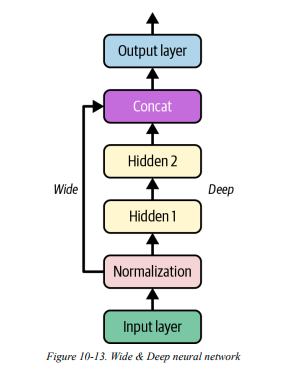

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [ ]:
cali_init = fetch_california_housing()

In [ ]:
data = pd.DataFrame(cali_init["data"], columns = cali_init["feature_names"])
target = pd.Series(cali_init["target"], name = cali_init["target_names"][0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [ ]:
train_size = int(len(data)*0.8)
test_size = int(len(data)*0.1)

In [ ]:
X_train, y_train = data[:train_size], target[:train_size]
X_test, y_test = data[train_size:train_size+test_size], target[train_size:train_size+test_size]
X_valid, y_valid = data[train_size+test_size:], target[train_size+test_size:]

In [ ]:
X_valid

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18576,2.0775,44.0,3.053156,1.026578,1321.0,4.388704,36.90,-121.76
18577,2.4375,20.0,4.790741,1.012963,1534.0,2.840741,36.93,-121.77
18578,3.0192,24.0,4.214751,0.969631,1844.0,4.000000,36.93,-121.77
18579,3.2813,33.0,4.671096,1.053156,1075.0,3.571429,36.93,-121.77
18580,2.6434,20.0,4.404918,1.044262,2154.0,3.531148,36.92,-121.76
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = "relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation = "relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [ ]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [ ]:
model = tf.keras.Model(inputs = [input_], outputs = [output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

In [104]:
model.compile(loss = "mse", optimizer = optimizer, metrics = "RootMeanSquaredError")

In [105]:
normalization_layer.adapt(X_train)

In [106]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
516/516 [==============================] - 2s 2ms/step - loss: 1.2212 - root_mean_squared_error: 1.1051 - val_loss: 3.1458 - val_root_mean_squared_error: 1.7737
Epoch 2/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4767 - root_mean_squared_error: 0.6904 - val_loss: 0.3644 - val_root_mean_squared_error: 0.6037
Epoch 3/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3746 - root_mean_squared_error: 0.6121 - val_loss: 0.2779 - val_root_mean_squared_error: 0.5271
Epoch 4/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3551 - root_mean_squared_error: 0.5959 - val_loss: 0.2760 - val_root_mean_squared_error: 0.5253
Epoch 5/20
516/516 [==============================] - 1s 3ms/step - loss: 0.3442 - root_mean_squared_error: 0.5867 - val_loss: 0.3330 - val_root_mean_squared_error: 0.5771
Epoch 6/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3300 - root_mean_squared_error: 0.5744 - val_loss: 0.5241 - val_

In [107]:
model.evaluate(X_valid, y_valid)

65/65 [==============================] - 0s 3ms/step - loss: 0.2880 - root_mean_squared_error: 0.5367


[0.2880299389362335, 0.5366842150688171]

In [108]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 104ms/step


array([[1.0355068 ],
       [1.3763465 ],
       [0.91227067]], dtype=float32)